In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import math
import csv

In [5]:
def print_percentage(x, description=""):
    print(description + "{0:.2%}".format(x))

In [6]:
def experiment(am, al, size):
    # am: absolute mortality rate
    # al: absolute lapse rate
    # size: size for experiment
    
    fm = math.log(1/(1-am)) # force of mortality
    fl = math.log(1/(1-al)) # force of lapse
    print_percentage(1 - math.exp(-fl), "絶対解約率:")
    
    # generate sample data
    D = np.random.exponential(scale=1/fm, size=size) if fm > 0 else [1]*size
    L = np.random.exponential(scale=1/fl, size=size) if fl > 0 else [1]*size

    lapse_count = 0
    death_count = 0
    exposure_lengths = []
    exposure_lengths_extended = []
    for i in range(size):
        d = min(D[i], 1) 
        l = min(L[i], 1)
        x = min(d, l)
        x_extended = 1 if l < min(1, d) else min(d, l)
        exposure_lengths.append(x)
        exposure_lengths_extended.append(x_extended)
        lapse_count += 1 if l < min(1, d) else 0
        death_count += 1 if d < min(1, l) else 0
    efl = lapse_count/sum(exposure_lengths) # 最尤推定量
    a.append(1-math.exp(-efl))
    b.append(lapse_count/sum(exposure_lengths_extended))
    c.append(lapse_count/sum(exposure_lengths))

    print(sum(exposure_lengths), lapse_count, death_count)
    print_percentage(1-math.exp(-efl), "解約力経由:")
    print_percentage(lapse_count/sum(exposure_lengths_extended), "長さ伸長方式:")
    print_percentage(lapse_count/sum(exposure_lengths), "長さ非伸長方式:")

In [ ]:
global a,b,c
a,b,c = [],[],[]
AM, AL = [],[]
units = [0.01*i for i in range(0, 10)] + [0.1*i for i in range(1,10)]
for i in units:
    for j in units:
        am,al = i,j
        AM.append(am)
        AL.append(al)
        print("experimetn start: ", am, al)
        experiment(am, al, 1000000)
        print('---------------------------------')

In [26]:
df = pd.DataFrame({'am':AM, 'al':AL, 'a':a,'b':b,'c':c})
df.to_csv('./result.csv')

In [47]:
via_power = df.pivot_table(index='al', columns='am', values='a')
extend = df.pivot_table(index='al', columns='am', values='b')
not_extend = df.pivot_table(index='al', columns='am', values='c')

In [48]:
extend/via_power - 1

am,0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.30000000000000004,0.4,0.5,0.6000000000000001,0.7000000000000001,0.8,0.9
al,,,,,,,,,,,,,,,,,,,
0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.01,0.000031,0.000024,-0.000038,0.000005,-0.000046,-0.000048,-0.000049,-0.000019,-0.000009,-0.000144,-0.000061,-0.000157,-0.000306,-0.000441,-0.000542,-0.000739,-0.000963,-0.001334,-0.001794
0.02,0.000046,-0.000030,-0.000021,0.000019,-0.000127,-0.000173,-0.000183,-0.000088,-0.000148,-0.000218,-0.000162,-0.000389,-0.000693,-0.000839,-0.001086,-0.001597,-0.001986,-0.002480,-0.003518
0.03,-0.000014,-0.000113,0.000025,-0.000099,-0.000120,-0.000071,-0.000157,-0.000181,-0.000245,-0.000164,-0.000326,-0.000476,-0.000901,-0.001258,-0.001834,-0.002245,-0.002825,-0.003848,-0.005161
0.04,0.000053,0.000024,-0.000153,-0.000135,-0.000267,-0.000158,-0.000168,-0.000246,-0.000307,-0.000323,-0.000291,-0.000849,-0.001242,-0.001717,-0.002360,-0.002937,-0.003995,-0.005099,-0.006920
0.05,-0.000017,-0.000058,-0.000130,-0.000079,-0.000095,-0.000287,-0.000340,-0.000416,-0.000356,-0.000386,-0.000455,-0.000920,-0.001336,-0.002148,-0.002672,-0.003684,-0.004952,-0.006418,-0.008863
0.06,-0.000002,-0.000087,-0.000227,-0.000146,-0.000159,-0.000215,-0.000232,-0.000385,-0.000279,-0.000495,-0.000471,-0.001009,-0.001772,-0.002546,-0.003235,-0.004537,-0.005869,-0.007695,-0.010254
0.07,-0.000124,0.000101,-0.000212,-0.000268,-0.000172,-0.000256,-0.000263,-0.000431,-0.000526,-0.000550,-0.000658,-0.001307,-0.002073,-0.002875,-0.004083,-0.005174,-0.006678,-0.008825,-0.011977
0.08,0.000143,-0.000056,0.000072,-0.000186,-0.000379,-0.000134,-0.000405,-0.000551,-0.000633,-0.000729,-0.000761,-0.001528,-0.002326,-0.003341,-0.004557,-0.005839,-0.007855,-0.010216,-0.013899


In [49]:
not_extend

am,0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.30000000000000004,0.4,0.5,0.6000000000000001,0.7000000000000001,0.8,0.9
al,,,,,,,,,,,,,,,,,,,
0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.01,0.009988,0.009985,0.009870,0.010086,0.009982,0.009937,0.010119,0.010046,0.009948,0.009995,0.010225,0.009965,0.010101,0.010067,0.010297,0.010067,0.009869,0.010187,0.009945
0.02,0.020033,0.020463,0.020014,0.020320,0.020154,0.020494,0.020052,0.020169,0.020191,0.020056,0.020280,0.020423,0.020383,0.020397,0.020188,0.020142,0.020463,0.019941,0.020425
0.03,0.030742,0.030467,0.030305,0.030446,0.030464,0.030602,0.030363,0.030851,0.030396,0.030352,0.030419,0.030523,0.030893,0.030276,0.030606,0.030244,0.030402,0.030540,0.030496
0.04,0.040719,0.040739,0.040804,0.040900,0.040787,0.040426,0.041145,0.040917,0.040751,0.040600,0.040687,0.040905,0.040748,0.041138,0.040665,0.040893,0.041412,0.040813,0.040816
0.05,0.051109,0.051261,0.051696,0.051313,0.051293,0.051086,0.051315,0.051603,0.051173,0.051164,0.051299,0.050893,0.050948,0.051627,0.050740,0.051632,0.051167,0.051157,0.052019
0.06,0.061880,0.061794,0.061719,0.061857,0.061983,0.061788,0.061902,0.061859,0.061217,0.061700,0.061757,0.061507,0.062075,0.061975,0.061798,0.061652,0.061837,0.061898,0.061788
0.07,0.072640,0.072445,0.072224,0.072526,0.072769,0.072360,0.071947,0.072112,0.072510,0.072457,0.072452,0.072714,0.072842,0.072856,0.072666,0.073183,0.072518,0.072003,0.072155
0.08,0.083539,0.084013,0.083497,0.082885,0.083665,0.083218,0.083159,0.082909,0.083456,0.083439,0.083888,0.083188,0.083382,0.083283,0.082941,0.083060,0.083729,0.083620,0.084078


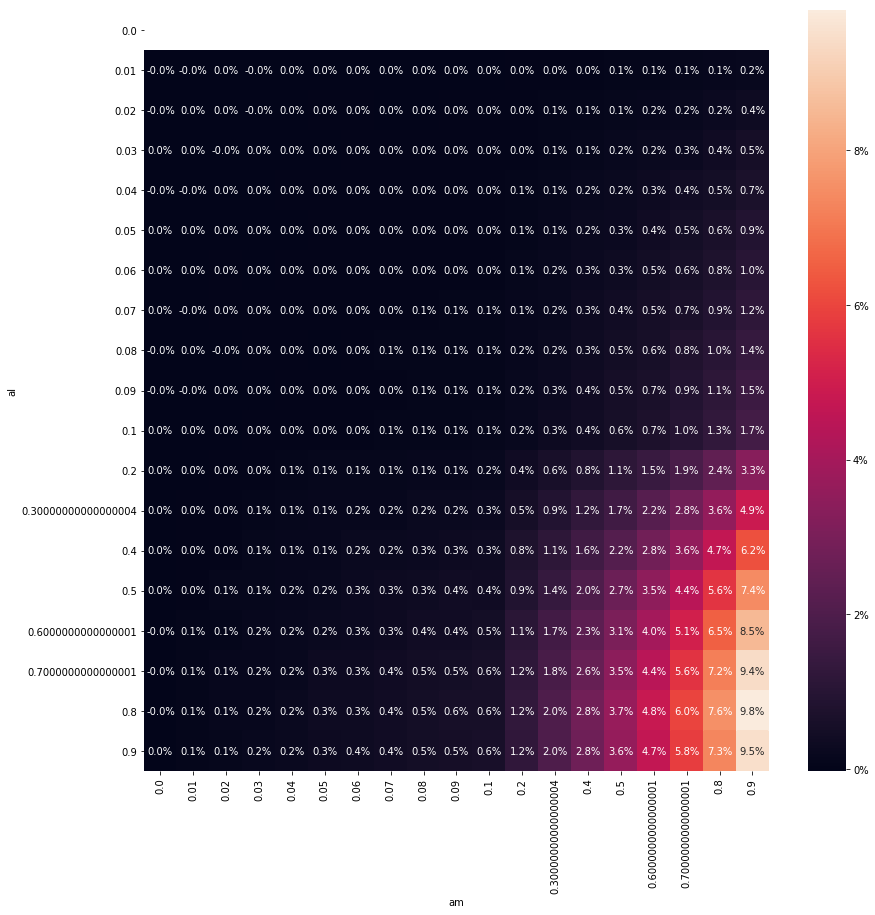

In [61]:
from matplotlib.ticker import FuncFormatter
plt.figure(figsize=(14,14))
fmt = lambda x,pos: '{:.0%}'.format(x)
sns.heatmap(1 - extend/via_power, annot=True, fmt='.1%', cbar_kws={'format':FuncFormatter(fmt)})
# sns.heatmap(extend, annot=True, fmt='.1%')